In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn import over_sampling, under_sampling
from imblearn.over_sampling import RandomOverSampler
import collections
from collections import Counter

print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")

Numpy version: 1.21.6
Pandas version: 1.3.5
Seaborn version: 0.11.2


In [ ]:
rcParams['figure.figsize'] = (10, 7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
import warnings
warnings.filterwarnings('ignore') ##hati hati menggunakan ini karena peringatan tidak bisa terdeteksi

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving marketing_campaign.csv to marketing_campaign.csv


In [ ]:
df = pd.read_csv("marketing_campaign.csv",sep=";")
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
925,5871,1979,Master,Together,24401.0,0,0,2012-08-31,98,73,...,8,0,0,0,0,0,0,3,11,0
2221,7366,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,...,1,0,1,1,0,0,0,3,11,1
2071,2712,1956,Graduation,Married,71866.0,0,1,2013-12-25,85,184,...,3,0,0,0,0,0,0,3,11,0
754,7723,1979,Graduation,Together,75507.0,0,0,2014-05-02,56,709,...,3,0,0,0,0,0,0,3,11,0


# Stage 2

## Handling Missing Value

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Terdapat 24 missing value pada kolom 'Income.

In [ ]:
(df.isna().sum()/df.shape[0]*100)['Income']

1.0714285714285714

Data yang hilang adalah sebanyak 1.07%. Maka dari itu, dikarenakan data yang hilang kurang dari 5% data total, baris dengan data yang hilang akan dihapuskan.

In [ ]:
df.dropna(inplace=True, subset=['Income'])

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Handling Duplicated Data

In [ ]:
df.duplicated().sum()

0

Tidak ada data duplikat pada dataset ini.

## Feature Extraction

In [ ]:
df['Age'] = 2023 - df['Year_Birth']
df['Dependents'] = df['Kidhome'] + df['Teenhome']

In [ ]:
columns = ['Education', 'Marital_Status', 'Income', 'Age', 'Dependents', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'ID', 'Z_CostContact', 'Z_Revenue', 'Complain', 'Year_Birth', 'Kidhome', 'Teenhome']
df = df[columns]

In [ ]:
df.sample()

,Education,Marital_Status,Income,Age,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,ID,Z_CostContact,Z_Revenue,Complain,Year_Birth,Kidhome,Teenhome
1031,Graduation,Single,91700.0,52,0,2013-01-17,58,576,172,961,...,0,0,1,9220,3,11,0,1971,0,0


## Label Encoding

Label Encoding akan dilakukan pada kolom 'Education' yang memiliki tipe data ordinal.

In [ ]:
x = np.array(df['Education'])
print(np.unique(x))

['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']


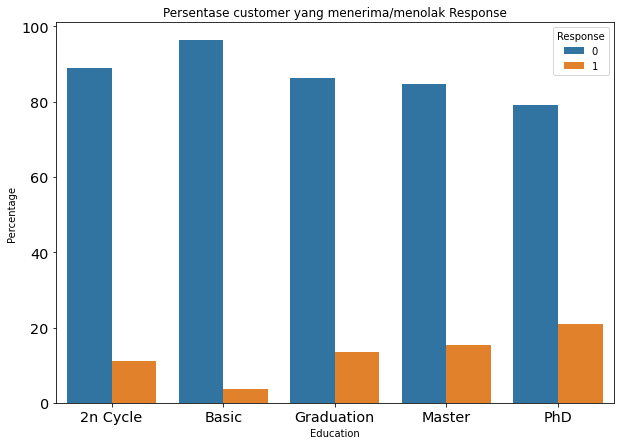

In [ ]:
df_temp = df.groupby(['Education', 'Response'])['ID'].count().reset_index()
df_temp_2 = df.groupby(['Education'])['ID'].count().reset_index()
df_merge = df_temp.merge(df_temp_2, on='Education', how='inner')
df_merge.columns = ['Education', 'Response', 'CountCust', 'TotalCust']
df_merge['Percentage'] = df_merge['CountCust'] / df_merge['TotalCust'] * 100
  
sns.barplot(x = 'Education', y = 'Percentage', data = df_merge, hue = 'Response')
plt.title('Persentase customer yang menerima/menolak Response')
plt.show()

Kategori "2n Cycle" memiliki arti yang sama dengan "Master". Persentase customer yang menolak dan menerima respon untuk kategori '2n Cycle' dan 'Master' juga kurang lebih sama. Maka dari itu, baris yang memiliki kategori "2n Cycle" akan dihapus dan digantikan dengan kaegori "Master".

In [ ]:
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')
x = np.array(df['Education'])
print(np.unique(x))

['Basic' 'Graduation' 'Master' 'PhD']


In [ ]:
df.sample()

,Education,Marital_Status,Income,Age,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,ID,Z_CostContact,Z_Revenue,Complain,Year_Birth,Kidhome,Teenhome
1446,Master,Married,78041.0,52,0,2012-12-16,93,482,35,553,...,0,0,0,8204,3,11,0,1971,0,0


Dilakukan perubahan feature categorical menjadi numeric sebagai berikut:

- 'Basic' --> 0
- 'Graduation' --> 1
- 'Master' --> 2
- 'PhD' --> 3

In [ ]:
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3    
}
df['Education'] = df['Education'].map(mapping_education)

In [ ]:
df.sample()

,Education,Marital_Status,Income,Age,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,ID,Z_CostContact,Z_Revenue,Complain,Year_Birth,Kidhome,Teenhome
1081,1,Married,36715.0,52,1,2012-11-17,16,172,10,125,...,0,0,1,247,3,11,0,1971,1,0


## One Hot Encoding (OHE)

One Hot Encoding akan dilakukan pada kolom 'Marital_Status' yang memiliki lebih dari 2 kategori dan tidak bertipe data ordinal.

In [ ]:
x = np.array(df['Marital_Status'])
print(np.unique(x))

['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


In [ ]:
df.head(5)

,Education,Marital_Status,Income,Age,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp1,AcceptedCmp2,Response,ID,Z_CostContact,Z_Revenue,Complain,Year_Birth,Kidhome,Teenhome
0,1,Single,58138.0,66,0,2012-09-04,58,635,88,546,...,0,0,1,5524,3,11,0,1957,0,0
1,1,Single,46344.0,69,2,2014-03-08,38,11,1,6,...,0,0,0,2174,3,11,0,1954,1,1
2,1,Together,71613.0,58,0,2013-08-21,26,426,49,127,...,0,0,0,4141,3,11,0,1965,0,0
3,1,Together,26646.0,39,1,2014-02-10,26,11,4,20,...,0,0,0,6182,3,11,0,1984,1,0
4,3,Married,58293.0,42,1,2014-01-19,94,173,43,118,...,0,0,0,5324,3,11,0,1981,1,0


Sebelum dilakukan OHE, banyak kategori dalam kolom 'Marital_Status' yang ambigu dan memiliki arti yang sama. Maka dari itu, dilakukan terlebih dahulu pergantian nama kategori.

In [ ]:
# Mengganti kategori 'Absurd' dan 'YOLO' menjadi 'Others'
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'YOLO'],'Others')
# Mengganti kategori 'Alone' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Alone'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

x = np.array(df['Marital_Status'])
print(np.unique(x))

['Divorced' 'Married' 'Others' 'Single' 'Widow']


In [ ]:
# Melakukan OHE
ohe = pd.get_dummies(df['Marital_Status'], prefix = 'Status')
df = df.join(ohe)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Age                  2216 non-null   int64  
 4   Dependents           2216 non-null   int64  
 5   Dt_Customer          2216 non-null   object 
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

In [ ]:
# Menghapus kolom Marital Status
df = df.drop(columns=['Marital_Status']).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Age                  2216 non-null   int64  
 3   Dependents           2216 non-null   int64  
 4   Dt_Customer          2216 non-null   object 
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [ ]:
df.columns

Index(['Education', 'Income', 'Age', 'Dependents', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'ID', 'Z_CostContact',
       'Z_Revenue', 'Complain', 'Year_Birth', 'Kidhome', 'Teenhome',
       'Status_Divorced', 'Status_Married', 'Status_Others', 'Status_Single',
       'Status_Widow'],
      dtype='object')

In [ ]:
columns2 = ['Age', 'Education', 'Status_Divorced', 'Status_Married', 
               'Status_Others', 'Status_Single', 'Status_Widow', 'Income','Dependents', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
               'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
            'ID', 'Year_Birth', 'Kidhome', 'Teenhome']
df = df[columns2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Education            2216 non-null   int64  
 2   Status_Divorced      2216 non-null   uint8  
 3   Status_Married       2216 non-null   uint8  
 4   Status_Others        2216 non-null   uint8  
 5   Status_Single        2216 non-null   uint8  
 6   Status_Widow         2216 non-null   uint8  
 7   Income               2216 non-null   float64
 8   Dependents           2216 non-null   int64  
 9   Dt_Customer          2216 non-null   object 
 10  Recency              2216 non-null   int64  
 11  MntWines             2216 non-null   int64  
 12  MntFruits            2216 non-null   int64  
 13  MntMeatProducts      2216 non-null   int64  
 14  MntFishProducts      2216 non-null   int64  
 15  MntSweetProducts     2216 non-null   i

## Feature Selection

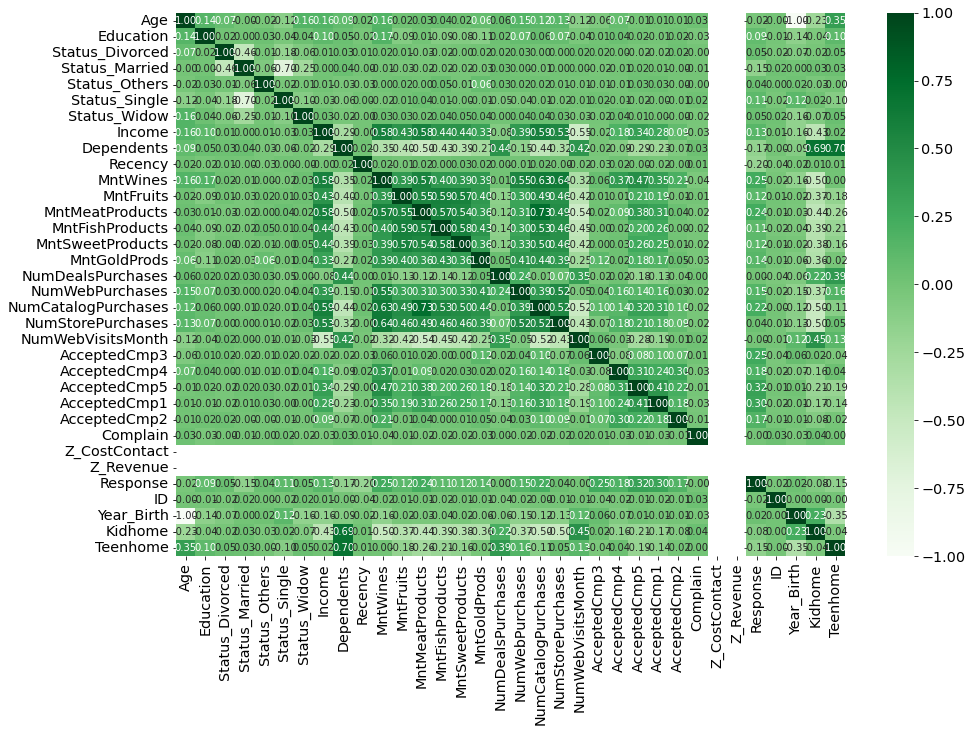

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')

In [ ]:
# membuang feature yang kurang relevan

drop_feature = ['ID', 'Z_CostContact', 'Z_Revenue', 'Complain', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer']
df = df.drop(columns=drop_feature)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2216 non-null   int64  
 1   Education            2216 non-null   int64  
 2   Status_Divorced      2216 non-null   uint8  
 3   Status_Married       2216 non-null   uint8  
 4   Status_Others        2216 non-null   uint8  
 5   Status_Single        2216 non-null   uint8  
 6   Status_Widow         2216 non-null   uint8  
 7   Income               2216 non-null   float64
 8   Dependents           2216 non-null   int64  
 9   Recency              2216 non-null   int64  
 10  MntWines             2216 non-null   int64  
 11  MntFruits            2216 non-null   int64  
 12  MntMeatProducts      2216 non-null   int64  
 13  MntFishProducts      2216 non-null   int64  
 14  MntSweetProducts     2216 non-null   int64  
 15  MntGoldProds         2216 non-null   i

Alasan drop feature:

- ID: ID bersifat unik di setiap row dengan korelasi sebesar -0.02 dengan Response sehingga tidak akan mempengaruhi target
- Z_CostContract: bernilai 3 di setiap row sehingga tidak memberikan informasi yang signifikan terhadap model prediksi
- Z_Revenue: bernilai 11 di setiap row sehingga tidak memberikan informasi yang signifikan terhadap model prediksi
- Complain: memiliki nilai korelasi senilai -0.00 dengan Response dan hanya sedikikt dari customer yang pernah melakukan complain, sehingga tidak signifikan terhadap target
- Year_Birth: dihapus dan dibuat feature baru 'Age' karena lebih menggambarkan umur customer
- Kidhome dan Teenhome: dihapus dan dibuat feature baru 'Dependents' untuk lebih menggambarkan berapa jumlah anggota keluarga yg dependent
- Dt_Customer: dihapus karena tanggal customer mulai bergabung tidak mempengaruhi model prediksi

## Univariate Analysis After Data Cleansing

In [ ]:
nums=['Income', 'Dependents','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cats =['Education','Status_Divorced','Status_Married', 'Status_Others', 'Status_Single', 'Status_Widow', 
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']

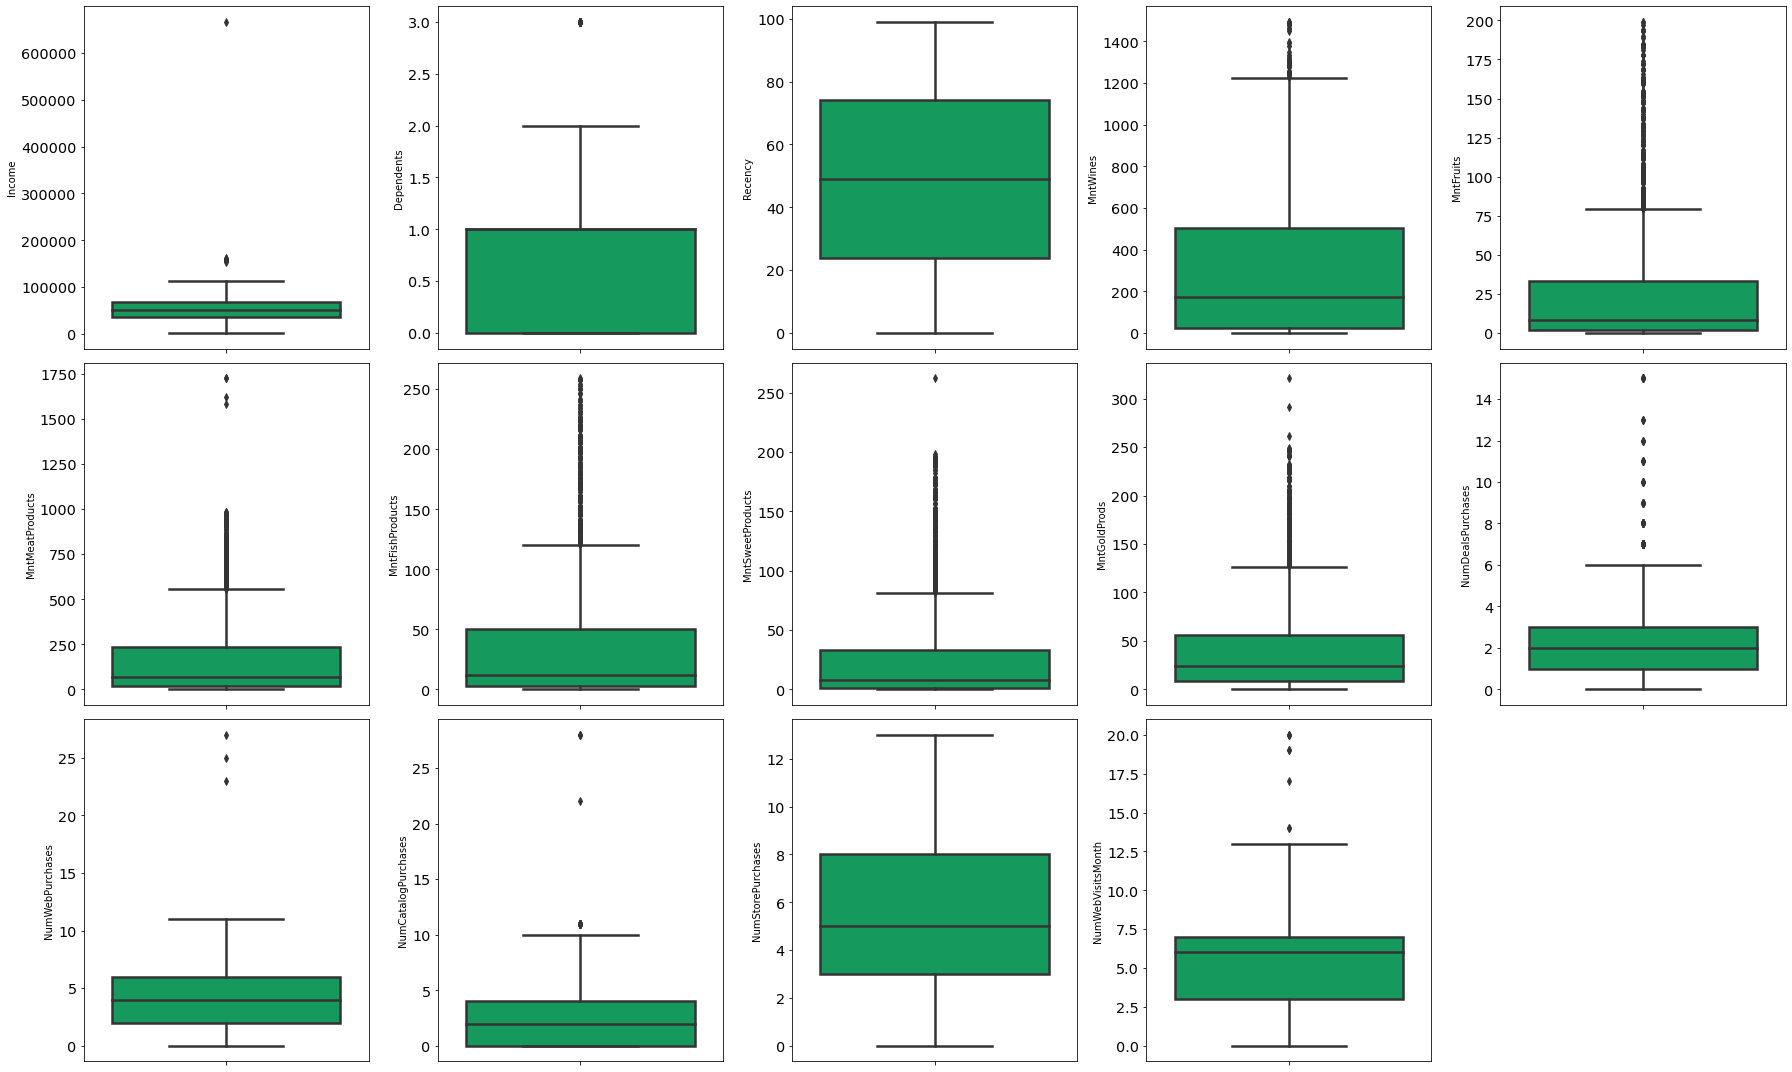

In [ ]:
# Individual Boxplot
plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='#00af5f', orient='v')
    plt.tight_layout()

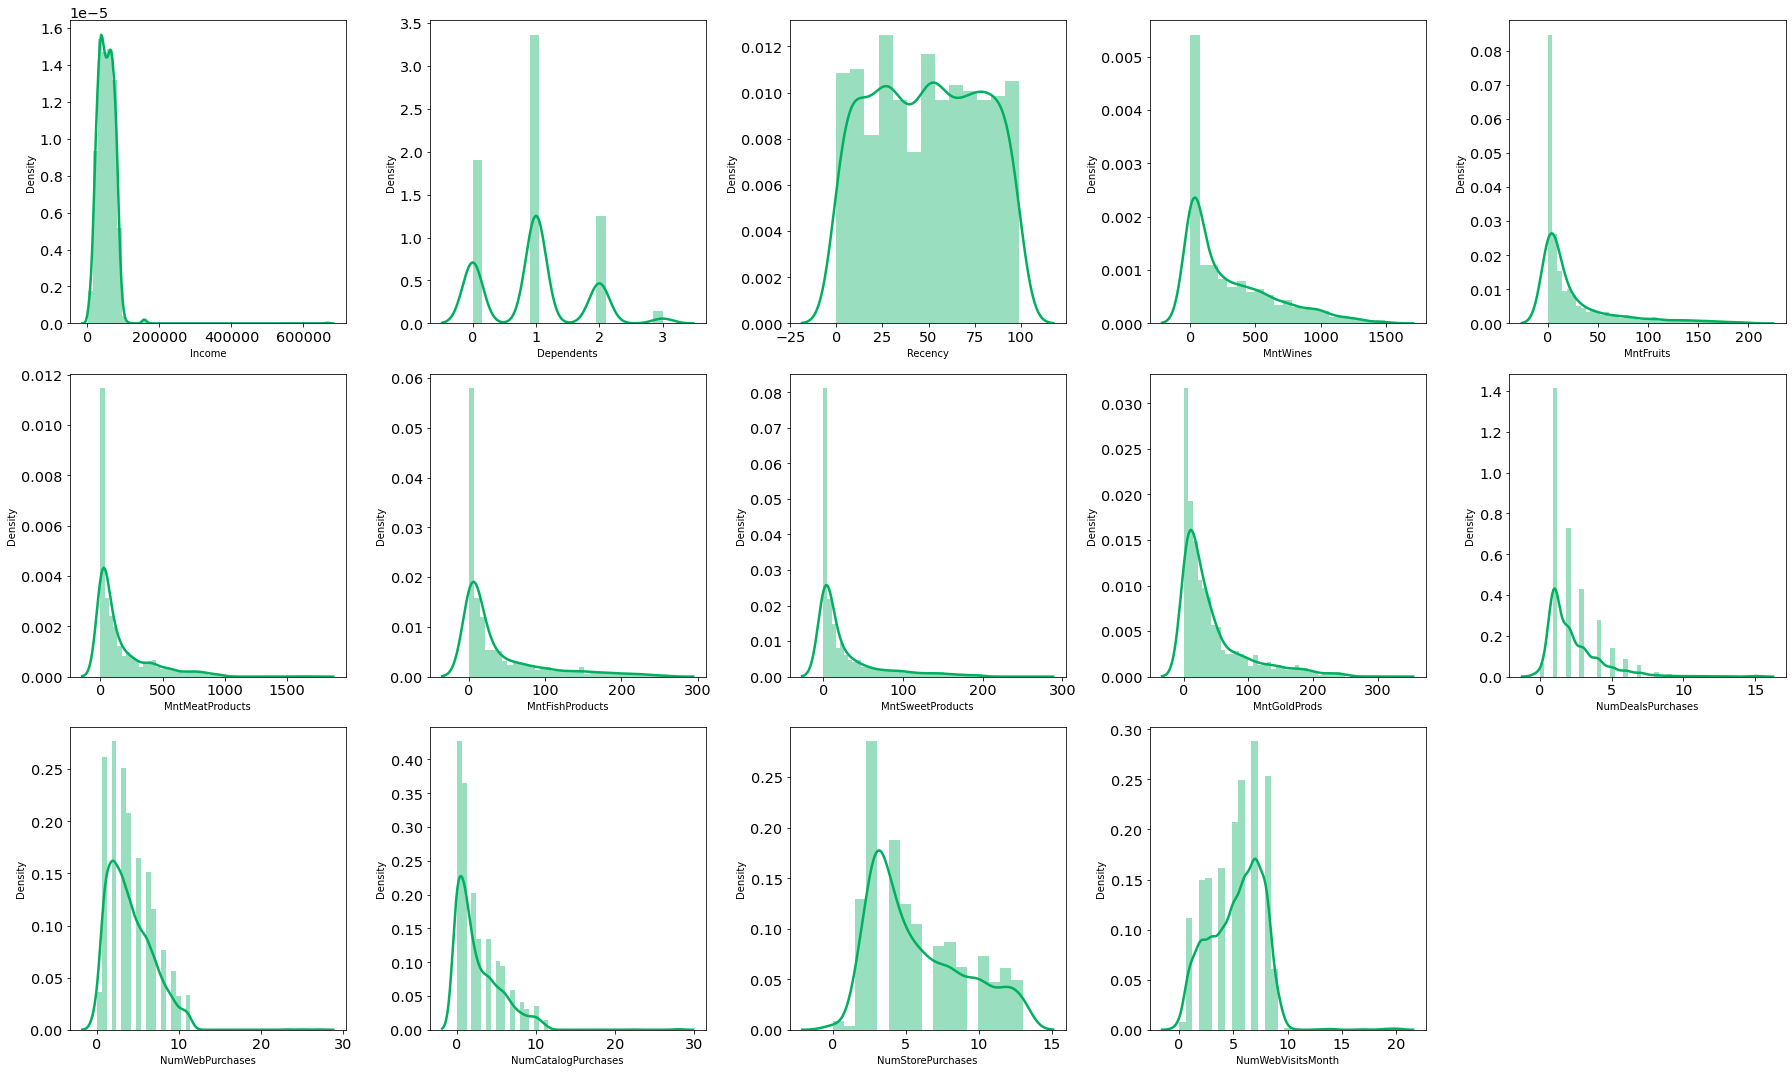

In [ ]:
# Individual Distplot
plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1) 
    sns.distplot(df[nums[i]], color='#00af5f')
    plt.tight_layout()

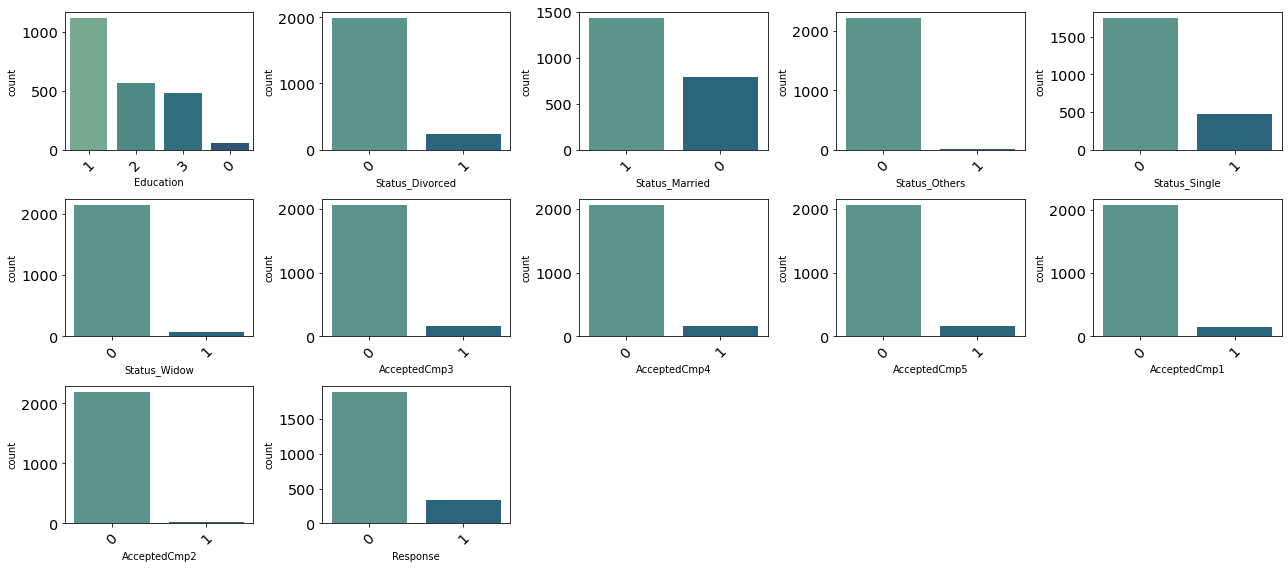

In [ ]:
# Individual Countplot
plt.figure(figsize=(18, 8))
for i in range(0, len(cats)):
    plt.subplot(3, 5, i+1)
    sns.countplot(df[cats[i]], palette='crest', orient='h', order=df[cats[i]].value_counts().index)
    plt.xticks(rotation=45)
    plt.tight_layout()

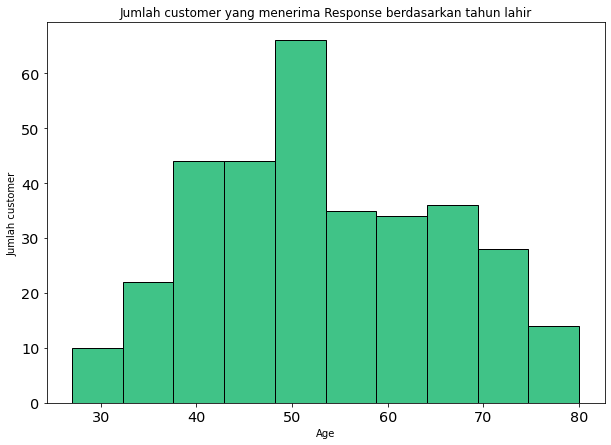

In [ ]:
# Age vs. Response

df_resp_yes = df[df['Response'] == 1]
sns.histplot(data=df_resp_yes, x='Age', color='#00af5f')
plt.xlabel('Age')
plt.ylabel('Jumlah customer')
plt.title('Jumlah customer yang menerima Response berdasarkan tahun lahir')
plt.show()

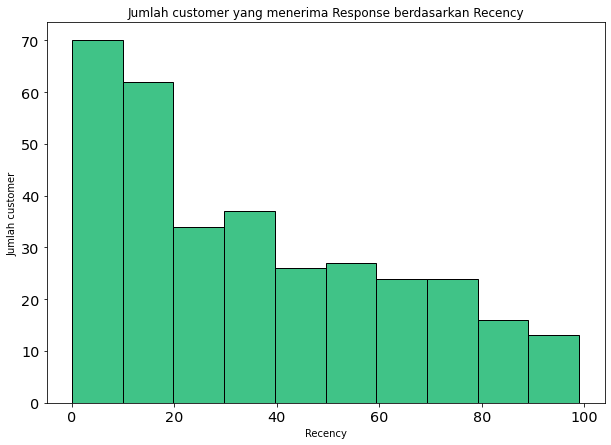

In [ ]:
# Recency vs. Response

df_resp_yes = df[df['Response'] == 1]
sns.histplot(data=df_resp_yes, x='Recency', color='#00af5f')
plt.xlabel('Recency')
plt.ylabel('Jumlah customer')
plt.title('Jumlah customer yang menerima Response berdasarkan Recency')
plt.show()

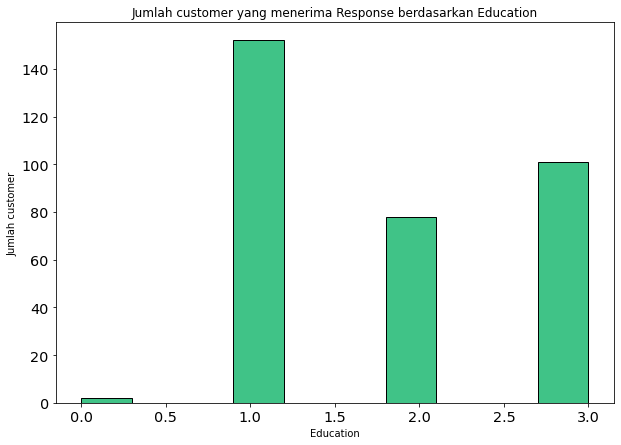

In [ ]:
# Education vs. Response

df_resp_yes = df[df['Response'] == 1]
sns.histplot(data=df_resp_yes, x='Education', color='#00af5f')
plt.xlabel('Education')
plt.ylabel('Jumlah customer')
plt.title('Jumlah customer yang menerima Response berdasarkan Education')
plt.show()

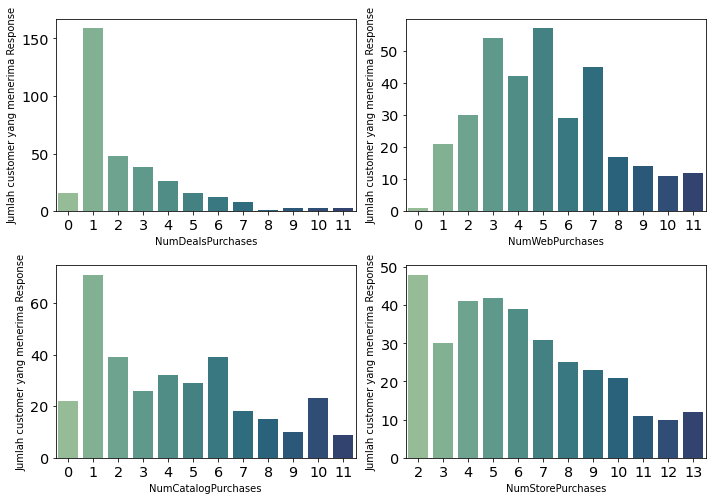

In [ ]:
# Purchase type vs. Response

purchase_type = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

df_resp_yes = df[df['Response'] == 1]
fig = plt.figure(figsize=(10, 7))
for i in range(0, len(purchase_type)):
  ax = fig.add_subplot(2, 2, i+1)
  sns.countplot(data=df_resp_yes, x=purchase_type[i], palette='crest')
  ax.set_xlabel(purchase_type[i])
  ax.set_ylabel('Jumlah customer yang menerima Response')
  plt.tight_layout()

# fig = plt.figure(figsize=(25,15))
# for i in range(0, len(nums)):
#   ax = fig.add_subplot(4, 4, i+1)
#   sns.stripplot(ax=ax, data=df, x='Complain', y=nums[i])
#   plt.tight_layout()

## Multivariate Analysis after Data Cleansing

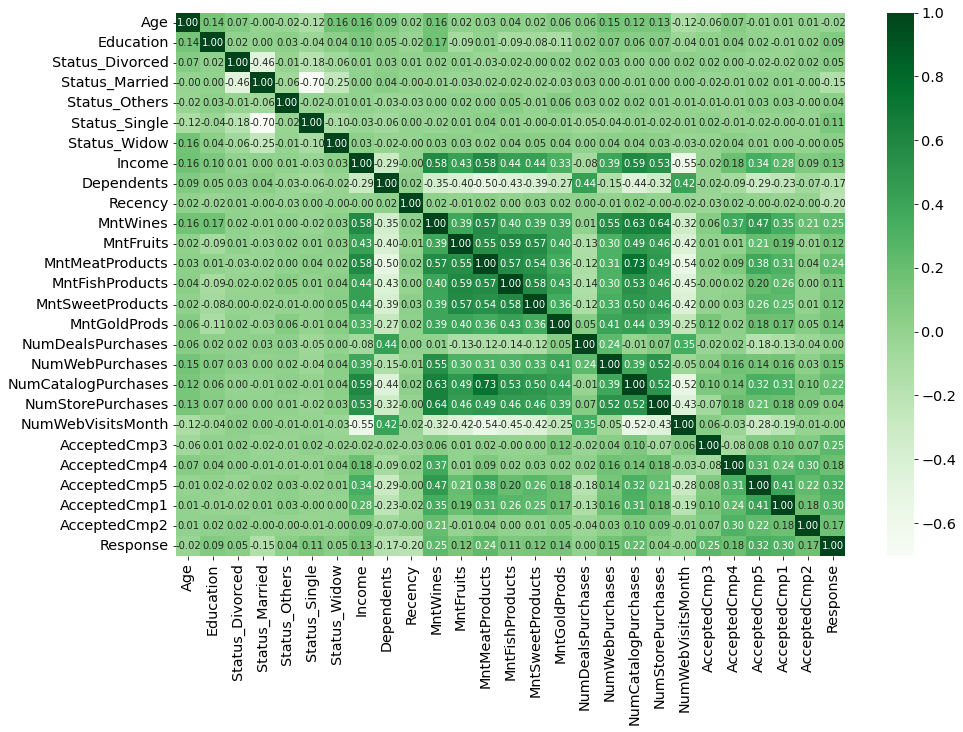

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.2f')

*   Customer dengan income tinggi lebih banyak membeli produk, terutama produk wine dan daging. Mereka juga lebih sering melakukan pembelian melalui katalog atau langsung ke toko
*   Customer yang memiliki dependents cenderung jarang membeli produk. Mereka juga lebih sering melakukan pembelian ketika sedang diskon dan cenderung sering mengunjungi website.





## Handling Outliers

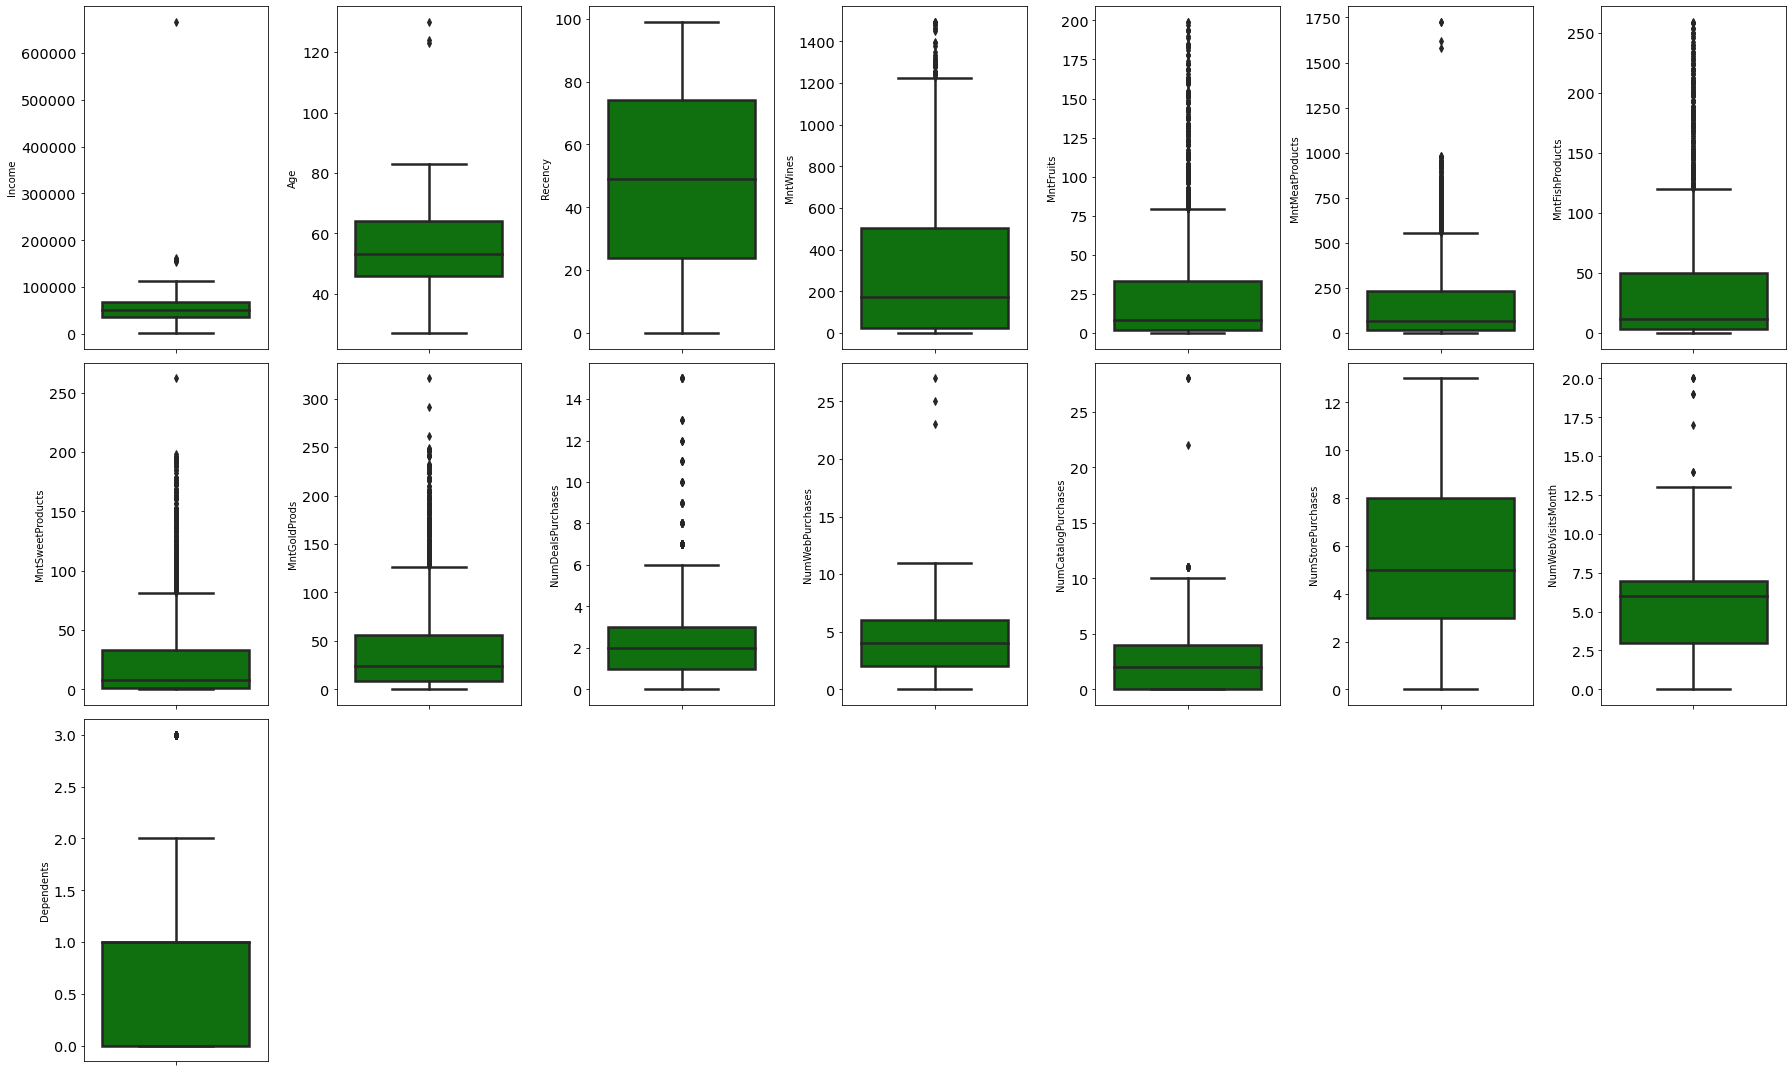

In [ ]:
nums=['Income','Age','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Dependents']

plt.figure(figsize=(25, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Diketahui kolom yang memiliki data outliers adalah:

- Income
- Age
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases
- NumWebVisitsMonth
- Dependents

Dikarenakan banyak kolom yang memiliki data outliers dan dataset hanya sedikit, diputuskan untuk mengahndle data outlier ini dengan melakukan log transformation.

### Log Transformation


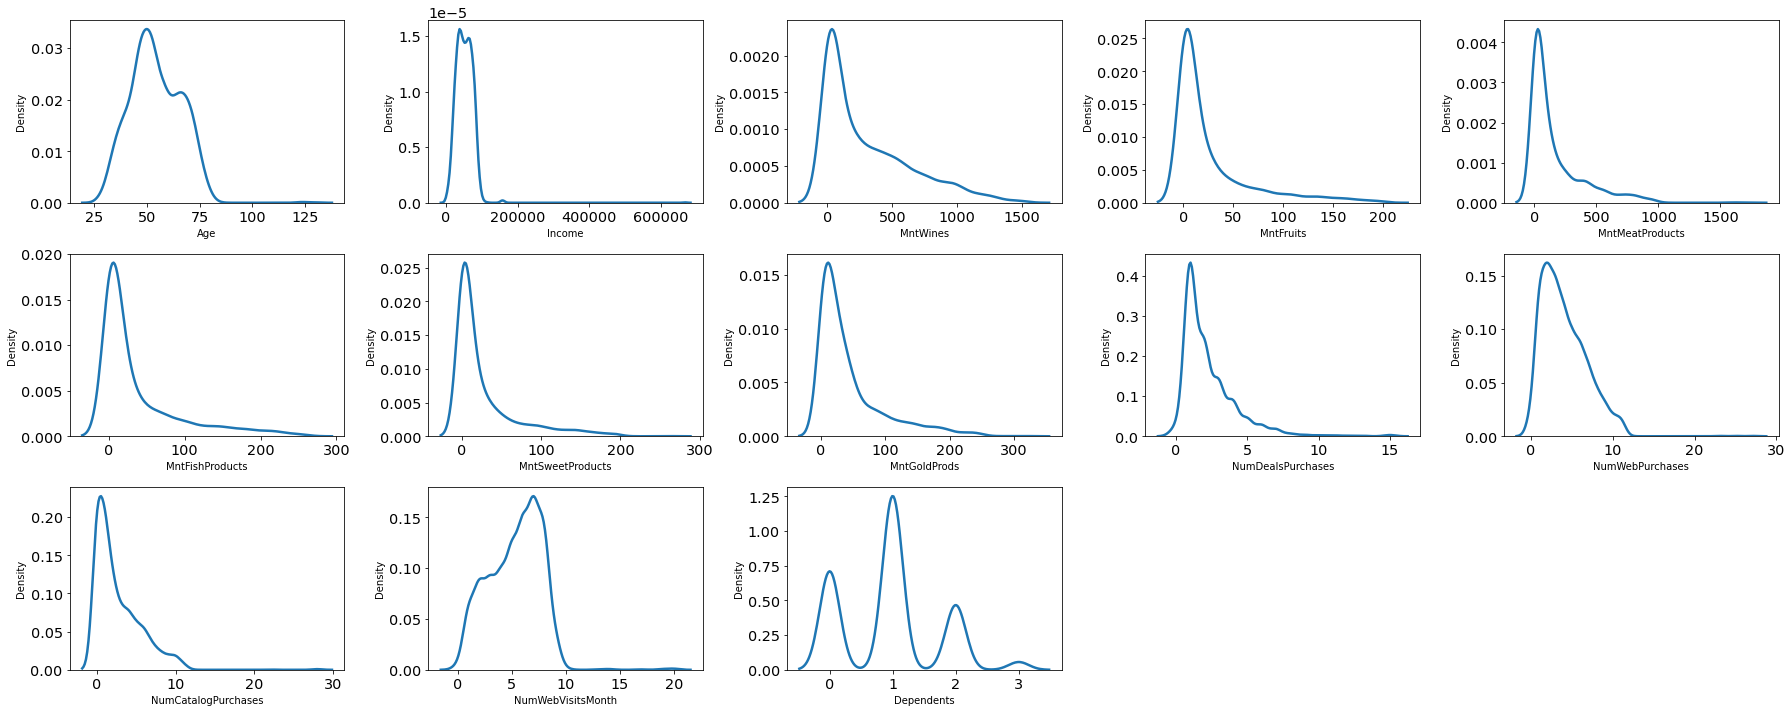

In [ ]:
data = ['Age', 'Income', 'MntWines', 'MntFruits', 
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
        'NumCatalogPurchases',  'NumWebVisitsMonth', 'Dependents']
plt.figure(figsize=(25, 10))

for i in range(0, len(data)):
  plt.subplot(3, 5, i+1)
  sns.kdeplot(df[data[i]])
  plt.tight_layout()

In [ ]:
for i in range(0, len(data)):
  skew = df[data[i]].skew(axis = 0, skipna = True)
  print(f'{data[i]}: {skew}')

Age: 0.35366147002882264
Income: 6.7634873728111184
MntWines: 1.1707200955543913
MntFruits: 2.101657525150595
MntMeatProducts: 2.0255768067844633
MntFishProducts: 1.916368950232168
MntSweetProducts: 2.1033275863706797
MntGoldProds: 1.8392309361295713
NumDealsPurchases: 2.415271762315824
NumWebPurchases: 1.1970370130708343
NumCatalogPurchases: 1.8810750511540515
NumWebVisitsMonth: 0.2180430456390019
Dependents: 0.4087482263114007


Berdasarkan website [oracle](https://https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html#:~:text=A%20skewness%20value%20greater%20than,the%20distribution%20is%20fairly%20symmetrical.) skew dianggap masih mempunyai distribusi simetris pada range -0.5 sampai 0.5. Maka dari itu akan dilakukan log transformation pada kolom:
Log Transformation:
- Income
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases

In [ ]:
log = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases']

df_log = df

In [ ]:
# Log Transformation
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'yeo-johnson')

for i in range(0, len(log)):
  df_log[log[i]] = pt.fit_transform(df[[log[i]]])

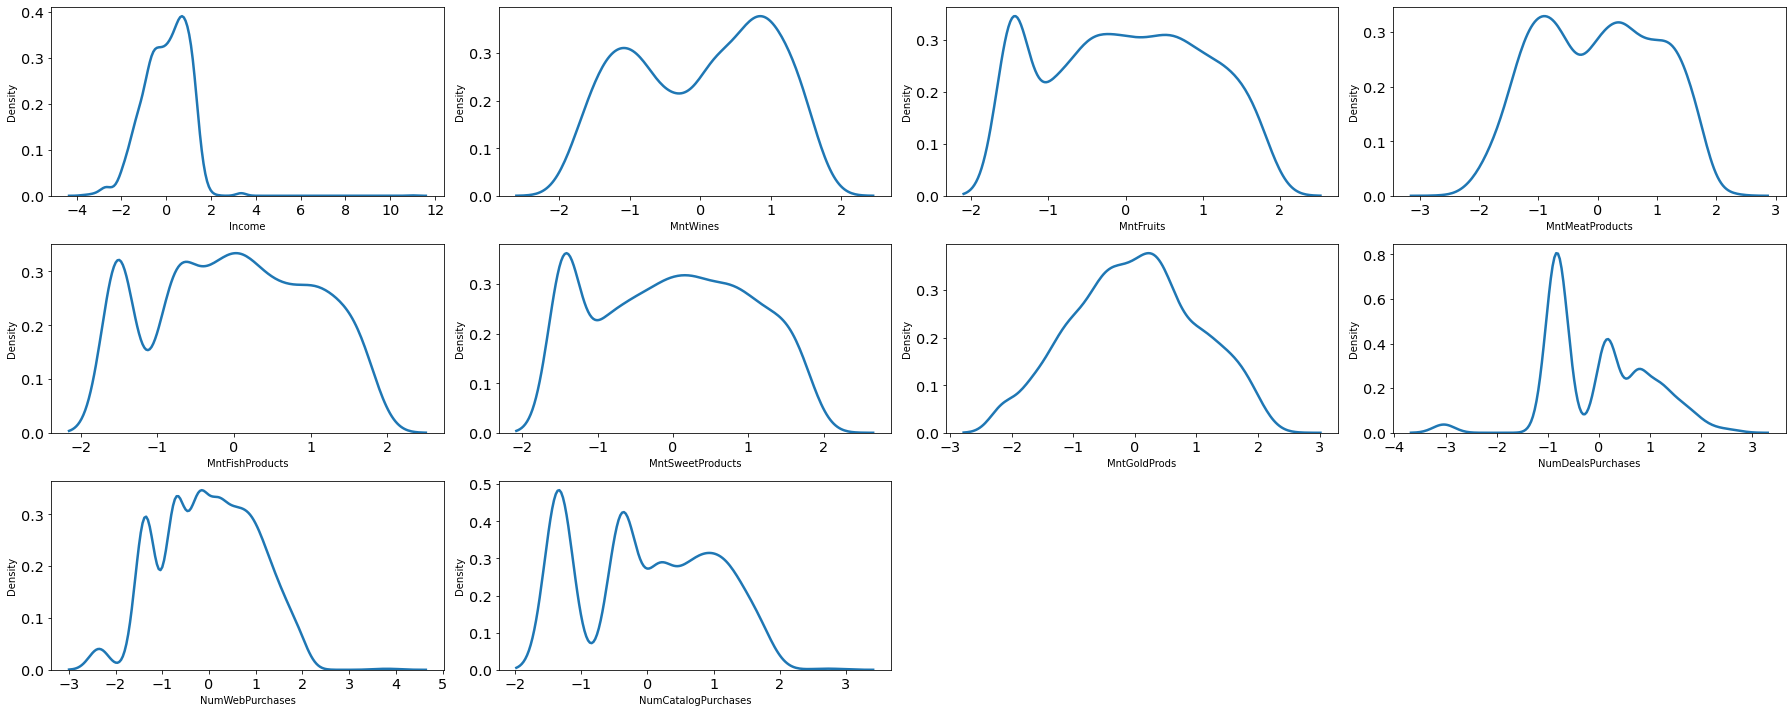

In [ ]:

plt.figure(figsize=(25, 10))

for i in range(0, len(log)):
  plt.subplot(3, 4, i+1)
  sns.kdeplot(df_log[log[i]])
  plt.tight_layout()

In [ ]:
for i in range(0, len(log)):
  skew = df[log[i]].skew(axis = 0, skipna = True)
  print(f'{log[i]}: {skew}')

## Split Data

Memisahkan data train dan test.

In [ ]:
X = df[['Age', 'Education', 'Status_Divorced', 'Status_Married',
       'Status_Others', 'Status_Single', 'Status_Widow', 'Income',
       'Dependents', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']]
y = df[['Response']]

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("X_train dataset: ", X_train.shape)  
print("y_train dataset: ", y_train.shape)  
print("X_test dataset: ", X_test.shape)  
print("y_test dataset: ", y_test.shape) 

X_train dataset:  (1551, 26)
y_train dataset:  (1551, 1)
X_test dataset:  (665, 26)
y_test dataset:  (665, 1)


Data train sebanyak 1551 baris dan data test sebanyak 665 baris.

## Handling Class Imbalance

In [ ]:
y_train['Response'].value_counts()

0    1318
1     233
Name: Response, dtype: int64

In [ ]:
(233/len(y_train))*100

15.022566086395875

Dataset masih tidak seimbang dikarenakan hanya 15.02% data yang mewakilkan customer merespon campaign.

### Random Oversampling

In [ ]:
X_over_ro, y_over_ro = over_sampling.RandomOverSampler(random_state=43).fit_resample(X_train, y_train)

In [ ]:
X_over_ro.shape

(2636, 26)

In [ ]:
y_over_ro.shape

(2636, 1)

In [ ]:
y_over_ro['Response'].value_counts()

0    1318
1    1318
Name: Response, dtype: int64

### SMOTE

In [ ]:
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(random_state=44).fit_resample(X_train, y_train)

In [ ]:
X_over_SMOTE.shape

(2636, 26)

In [ ]:
y_over_SMOTE.shape

(2636, 1)

In [ ]:
y_over_SMOTE['Response'].value_counts()

0    1318
1    1318
Name: Response, dtype: int64

# Stage 3

## Data Without Class Imbalance Handling

### Declaring Functions

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

def eval_clf_imbalance(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    cls_report_imbalance_train = classification_report(y_train, y_pred_train)
    print(f"Classification Report (Train) : \n {cls_report_imbalance_train}")
    cls_report_imbalance_test = classification_report(y_test, y_pred)
    print(f"Classification Report (Test) : \n {cls_report_imbalance_test}")
    
    acc_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_train = roc_auc_score(y_train, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
    
#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
    # print('roc_auc (crossval train): '+ str(round(score['train_score'].mean(), 4)))
    # print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(), 4)))
    
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

### Model Fitting

Algoritma yang akan digunakan:
- Logistic Reggresion
- Decision Tree
- Random Forest
- K-Nearest Neighbor
- XGBoost
- AdaBoost
- Naive Bayes

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from xgboost import XGBClassifier 

from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'XGB Classifier', 'AdaBoost Classifier']
algorithms = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, AdaBoostClassifier]

# Result List
acc_test_ni = []
precision_test_ni = []
recall_test_ni = []
f1_test_ni = []
roc_auc_train_ni = []
roc_auc_test_ni = []
roc_auc_crossval_train_ni = []
roc_auc_crossval_test_ni = []

In [ ]:
# Model Evaluation using Imbalance Data
i = 0

for model_type in algorithms:
    # Fitting and using the algorithms
    model = model_type()
    model.fit(X_train, y_train)
    print(models[i])
    result = eval_clf_imbalance(model)
    
    # Adding the results to the list
    acc_test_ni.append(result['Test Accuracy'])
    precision_test_ni.append(result['Test Precision'])
    recall_test_ni.append(result['Test Recall'])
    f1_test_ni.append(result['Test F1'])
    roc_auc_train_ni.append(result['Train ROC AUC'])
    roc_auc_test_ni.append(result['Test ROC AUC'])
    roc_auc_crossval_train_ni.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test_ni.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1318
           1       0.73      0.45      0.56       233

    accuracy                           0.89      1551
   macro avg       0.82      0.71      0.75      1551
weighted avg       0.88      0.89      0.88      1551

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       565
           1       0.67      0.38      0.48       100

    accuracy                           0.88       665
   macro avg       0.78      0.67      0.71       665
weighted avg       0.86      0.88      0.86       665

Decision Tree
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      0.98      0.99       233

    accuracy                           1.00    

### Fitting Result

In [ ]:
imbalance_data_df = pd.DataFrame(list(zip(models, acc_test_ni, precision_test_ni, recall_test_ni, f1_test_ni, roc_auc_train_ni, roc_auc_test_ni, roc_auc_crossval_train_ni, roc_auc_crossval_test_ni)), columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Train ROC AUC', 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])

In [ ]:
imbalance_data_df

## Data After Random Oversampling

### Declaring Function

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

def eval_clf_ro(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_ro)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_ro)
    
    cls_report_ro_train = classification_report(y_over_ro, y_pred_train)
    print(f"Classification Report (Train) : \n {cls_report_ro_train}")
    cls_report_ro_test = classification_report(y_test, y_pred)
    print(f"Classification Report (Test) : \n {cls_report_ro_test}")
    
    
    acc_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_train = roc_auc_score(y_over_ro, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
    
#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
    # print('roc_auc (crossval train): '+ str(round(score['train_score'].mean(), 4)))
    # print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(), 4)))
    
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    print(model.best_estimator_.get_params())

### Model Fitting

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'XGB Classifier', 'AdaBoost Classifier']
algorithms = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, AdaBoostClassifier]

# Result List
acc_test_ro = []
precision_test_ro = []
recall_test_ro = []
f1_test_ro = []
roc_auc_train_ro = []
roc_auc_test_ro = []
roc_auc_crossval_train_ro = []
roc_auc_crossval_test_ro = []

In [ ]:
# Model Evaluation using Random Oversampling Data
i = 0

for model_type in algorithms:
    # Fitting and using the algorithms
    model = model_type()
    model.fit(X_over_ro, y_over_ro)
    print(models[i])
    result = eval_clf_ro(model)
    
    # Adding the results to the list
    acc_test_ro.append(result['Test Accuracy'])
    precision_test_ro.append(result['Test Precision'])
    recall_test_ro.append(result['Test Recall'])
    f1_test_ro.append(result['Test F1'])
    roc_auc_train_ro.append(result['Train ROC AUC'])
    roc_auc_test_ro.append(result['Test ROC AUC'])
    roc_auc_crossval_train_ro.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test_ro.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1318
           1       0.82      0.80      0.81      1318

    accuracy                           0.81      2636
   macro avg       0.81      0.81      0.81      2636
weighted avg       0.81      0.81      0.81      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       565
           1       0.48      0.85      0.62       100

    accuracy                           0.84       665
   macro avg       0.73      0.84      0.76       665
weighted avg       0.90      0.84      0.86       665

Decision Tree
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00    

### Fitting Result

In [ ]:
ro_df = pd.DataFrame(list(zip(models, acc_test_ro, precision_test_ro, recall_test_ro, f1_test_ro, roc_auc_train_ro, roc_auc_test_ro, roc_auc_crossval_train_ro, roc_auc_crossval_test_ro)), columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 'Train ROC AUC', 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])
ro_df

## Data After Oversampling with SMOTE

### Declaring Function

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

def eval_clf_SMOTE(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_over_SMOTE)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_over_SMOTE)
    
    cls_report_smote_train = classification_report(y_over_SMOTE, y_pred_train)
    print(f"Classification Report (Train) : \n {cls_report_smote_train}")
    cls_report_smote_test = classification_report(y_test, y_pred)
    print(f"Classification Report (Test) : \n {cls_report_smote_test}")

    acc_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    roc_auc_train = roc_auc_score(y_over_SMOTE, y_pred_proba_train[:, 1])
    roc_auc_test = roc_auc_score(y_test, y_pred_proba[:, 1])
    
#     print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
#     print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
#     print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
#     print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train = round(score['train_score'].mean(), 4)
    roc_auc_crossval_test = round(score['test_score'].mean(), 4)
    # print('roc_auc (crossval train): '+ str(round(score['train_score'].mean(), 4)))
    # print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(), 4)))
    
    eval_result = {
        'Test Accuracy': acc_test,
        'Test Precision': precision_test,
        'Test Recall': recall_test,
        'Test F1': f1_test,
        'Train ROC AUC': roc_auc_train,
        'Test ROC AUC': roc_auc_test,
        'Crossval Train ROC AUC': roc_auc_crossval_train,
        'Crossval Test ROC AUC': roc_auc_crossval_test
    }
    return eval_result

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    print(model.best_estimator_.get_params())

### Model Fitting

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier', 'XGB Classifier', 'AdaBoost Classifier']
algorithms = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, AdaBoostClassifier]

# Result List
acc_test = []
precision_test = []
recall_test = []
f1_test = []
roc_auc_train = []
roc_auc_test = []
roc_auc_crossval_train = []
roc_auc_crossval_test = []

In [ ]:
### Model Evaluation using SMOTE Data
i = 0

for model_type in algorithms:
    # Fitting and using the algorithms
    model = model_type()
    model.fit(X_over_SMOTE, y_over_SMOTE)
    print(models[i])
    result = eval_clf_SMOTE(model)
    
    # Adding the results to the list
    acc_test.append(result['Test Accuracy'])
    precision_test.append(result['Test Precision'])
    recall_test.append(result['Test Recall'])
    f1_test.append(result['Test F1'])
    roc_auc_train.append(result['Train ROC AUC'])
    roc_auc_test.append(result['Test ROC AUC'])
    roc_auc_crossval_train.append(result['Crossval Train ROC AUC'])
    roc_auc_crossval_test.append(result['Crossval Test ROC AUC'])
    
    i += 1

Logistic Regression
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1318
           1       0.85      0.82      0.83      1318

    accuracy                           0.83      2636
   macro avg       0.84      0.83      0.83      2636
weighted avg       0.84      0.83      0.83      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       565
           1       0.50      0.69      0.58       100

    accuracy                           0.85       665
   macro avg       0.72      0.78      0.74       665
weighted avg       0.87      0.85      0.86       665

Decision Tree
Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00    

### Fitting Result

In [ ]:
smote_df = pd.DataFrame(list(zip(models, acc_test, precision_test, recall_test, f1_test, roc_auc_train, 
                                 roc_auc_test, roc_auc_crossval_train, roc_auc_crossval_test)), 
                        columns=['Model', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1', 
                                 'Train ROC AUC', 'Test ROC AUC', 'Crossval Train ROC AUC', 'Crossval Test ROC AUC'])
smote_df

## Modeling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
def get_metrics(y_pred, y_act, model_name):
    recall =  recall_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred)
    roc_auc = roc_auc_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred)
    accuracy = balanced_accuracy_score(y_act, y_pred)

    metrics_result = dict(model_name=model_name, 
                        recall=recall, 
                        precision=precision, 
                        roc_auc=roc_auc, 
                        f1=f1,
                        accuracy=accuracy)
    return metrics_result


def prediction(X_train, y_train, X_test, y_test, clf, model_name='decision tree'):
  
    clf = clf
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)


    result = dict()
    test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, model_name=model_name)
    train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, model_name=model_name)

    result['test'] = test_result
    result['train'] = train_result
    result['y_test'] = y_test
    result['y_test_pred'] = y_test_pred
    result['y_train'] = y_train
    result['y_train_pred'] = y_train_pred
    result['clf'] = clf
    result['x_train'] = X_train
    result['x_test'] = X_test

    del clf

    return result
  
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Random Forest 

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_over_ro, y_over_ro)
eval_clf_ro(rf)

Classification Report (Train) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1318

    accuracy                           1.00      2636
   macro avg       1.00      1.00      1.00      2636
weighted avg       1.00      1.00      1.00      2636

Classification Report (Test) : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.94       565
           1       0.71      0.40      0.51       100

    accuracy                           0.89       665
   macro avg       0.81      0.69      0.72       665
weighted avg       0.87      0.89      0.87       665



{'Test Accuracy': 0.8857142857142857,
 'Test Precision': 0.7142857142857143,
 'Test Recall': 0.4,
 'Test F1': 0.5128205128205129,
 'Train ROC AUC': 0.999964884487233,
 'Test ROC AUC': 0.882858407079646,
 'Crossval Train ROC AUC': 0.9998,
 'Crossval Test ROC AUC': 0.8735}

In [ ]:
%pip install mlxtend --upgrade

#### Hyperparameter Tuning

In [ ]:


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 20)], # Jumlah subtree 
                       bootstrap = [True, False], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1] # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Predict & Evaluation
rf_hyper = prediction(X_over_ro, y_over_ro, X_test, y_test, rf_tuned, model_name='random forest_hyperparam')


In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

In [ ]:
from numpy.ma.core import log2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
rf2 = RandomForestClassifier(n_estimators = 158, 
                              bootstrap = True, 
                              criterion = 'gini',
                              max_depth = 110,  
                              min_samples_split = 4, 
                              min_samples_leaf = 1, 
                              max_features = 'log2', 
                              n_jobs = -1,
                              random_state = 42)
rf2.fit(X_over_ro, y_over_ro)
# rf2_pred = rf2.predict(X_test)
# rf2_pred_train = rf2.predict(X_over_ro)
eval_clf_ro(rf2)

#### Learning Curve

In [ ]:
# Learning curve
# param_values = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 110, num = 50)] # max_depth
# param_values = [int(x) for x in np.linspace(start = 2, stop = 20, num = 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(start = 1, stop = 20, num = 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
  model = RandomForestClassifier(n_estimators = 560, max_depth = 7, min_samples_split = 17, min_samples_leaf = c) 

  model.fit(X_over_ro, y_over_ro)

  # eval on train
  y_pred_train_proba = model.predict_proba(X_over_ro)
  train_auc = roc_auc_score(y_over_ro, y_pred_train_proba[:,1])
  train_scores.append(train_auc)

  # eval on test
  y_pred_proba = model.predict_proba(X_test)
  test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
  test_scores.append(test_auc)

  print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Fitting Result

In [ ]:
rfc = RandomForestClassifier(n_estimators = 560, 
                       bootstrap = True, 
                       criterion = 'gini',
                       max_depth = 7,  
                       min_samples_split = 17, 
                       min_samples_leaf = 15, 
                       max_features = 'log2', 
                       n_jobs = -1,
                       random_state = 42)
rfc.fit(X_over_ro, y_over_ro)
eval_clf_ro(rfc)

#### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

rfc_pred = rfc.predict(X_test)
rfc_pred_train = rfc.predict(X_over_ro)

rfc_cm = confusion_matrix(y_test, rfc_pred)
print(rfc_cm)

In [ ]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                rfc_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(4,4))
sns.heatmap(rfc_cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix random forest classifier Tunning')
# plt.savefig('Confusion Matrix random forest classifier.png')
plt.show()

### XGBoost

In [ ]:
xg = xgb.XGBClassifier(random_state = 42)
xg.fit(X_over_ro, y_over_ro)
eval_clf_ro(xg)

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = xgb.XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Predict & Evaluation
xg_hyper = prediction(X_over_ro, y_over_ro, X_test, y_test, xg_tuned, model_name='xgboost_hyperparam')

In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

In [ ]:
from numpy.ma.core import log2
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
xg2 = xgb.XGBClassifier(max_depth = 50,
                 min_child_weight = 2,
                 gamma = 0.1,
                 tree_method = 'approx',
                 colsample_bytree = 0.7000000000000001,
                 eta = 0.8484848484848485,
                 alpha = 0.9)

xg2.fit(X_over_ro, y_over_ro)
xg2_pred = xg2.predict(X_test)
xg2_pred_train = xg2.predict(X_over_ro)
eval_clf_ro(xg2)

#### Learning Curve

In [ ]:
# Learning curve
param_values = [int(x) for x in np.linspace(1, 20, 20)] # max_depth
# param_values = [int(x) for x in np.linspace(1, 20, 20)] # min_child_weight
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] # gamma
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] # colsample_bytree
# param_values = [float(x) for x in np.linspace(0, 1, num = 100)] # eta
# param_values = [float(x) for x in np.linspace(0, 1, num = 11)] # alpha

train_scores = []
test_scores = []

for c in param_values:
  model = XGBClassifier(max_depth=c, min_child_weight=17, colsample_bytree=1.0)
  
  model.fit(X_over_ro, y_over_ro)

  # eval on train
  y_pred_train_proba = model.predict_proba(X_over_ro)
  train_auc = roc_auc_score(y_over_ro, y_pred_train_proba[:,1])
  train_scores.append(train_auc)

  # eval on test
  y_pred_proba = model.predict_proba(X_test)
  test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
  test_scores.append(test_auc)

  print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Fitting Result

In [ ]:
xgc = XGBClassifier(max_depth=3, min_child_weight=17, colsample_bytree=1, 
                    random_state = 42)
xgc.fit(X_over_ro, y_over_ro)
eval_clf_ro(xgc)

#### Confusion Matrix

In [ ]:
xgc_pred = xgc.predict(X_test)
xgc_pred_train = xgc.predict(X_over_ro)

xgc_cm = confusion_matrix(y_test, xgc_pred)
print(xgc_cm)

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                xgc_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(4,4))
sns.heatmap(xgc_cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix XGBoost classifier Tunning')
# plt.savefig('Confusion Matrix random forest classifier.png')
plt.show()

### AdaBoost

In [ ]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_over_ro, y_over_ro)
eval_clf_ro(ab)

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='roc_auc')

# Predict & Evaluation
ab_hyper = prediction(X_over_ro, y_over_ro, X_test, y_test, ab_tuned, model_name='adaboost_hyperparam')

In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

In [ ]:
from numpy.ma.core import log2
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
ab2 = AdaBoostClassifier(n_estimators = 1700,
                        learning_rate = 0.07394736842105264,
                        algorithm = 'SAMME.R')

ab2.fit(X_over_ro, y_over_ro)
ab2_pred = ab2.predict(X_test)
ab2_pred_train = ab2.predict(X_over_ro)
eval_clf_ro(ab2)

#### Learning Curve

In [ ]:
# Learning curve
# param_values = [int(x) for x in np.linspace(1, 250, 200)] # n_estimators
param_values = [float(x) for x in np.linspace(start = 0.001, stop = 1, num = 50)] # learning_rate

train_scores = []
test_scores = []

for c in param_values:
  model = AdaBoostClassifier(n_estimators=250, learning_rate=c)
  
  model.fit(X_over_ro, y_over_ro)

  # eval on train
  y_pred_train_proba = model.predict_proba(X_over_ro)
  train_auc = roc_auc_score(y_over_ro, y_pred_train_proba[:,1])
  train_scores.append(train_auc)

  # eval on test
  y_pred_proba = model.predict_proba(X_test)
  test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
  test_scores.append(test_auc)

  print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

#### Fitting Result

In [ ]:
abc = AdaBoostClassifier(n_estimators=243, learning_rate=0.62, 
                         algorithm='SAMME.R', random_state=42)
abc.fit(X_over_ro, y_over_ro)
eval_clf_ro(abc)

#### Confusion Matrix

In [ ]:
abc_pred = abc.predict(X_test)
abc_pred_train = abc.predict(X_over_ro)

abc_cm = confusion_matrix(y_test, abc_pred)
print(abc_cm)

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                abc_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(4,4))
sns.heatmap(abc_cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix random forest classifier Tunning')
# plt.savefig('Confusion Matrix random forest classifier.png')
plt.show()

## Feature Importance

In [ ]:
def show_feature_importance(model_tuned):
    feat_importances = pd.Series(model_tuned.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Random Forest

In [ ]:
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

Fitur yang paling mempengaruhi customer merespon campaign terakhir adalah:
- Recency rendah: customer yang baru-baru ini melakukan pembelian
- MntGoldProducts tinggi: customer yang membeli produk emas dalam jumlah yang besar
- NumWebVisitsMonth tinggi: customer yang sering mengunjungi website perusahaan, dimana customer dapat melakukan pembelian melalui website perusahaan

Rekomendasi:
- Menargetkan campaign kepada customer yang baru-baru ini melakukan pembelian
- Menargetkan campaign kepada customer yang banyak melakukan pembelian produk emas atau melakukan campaign yang berhubungan dengan produk emas
- Melakukan campaign melalui website perusahaan
